# Debugging exercise (Solved)


The following code has several errors that you should detect and correct.   

The goal of this code is to compute and print the orbit of a planet.
The user can define the basic parameters for the planet (mass, semi-major axis, eccentricity) and the star (mass).   

In [ ]:
# CODE TO DEBUG ... 
import matplotlib.pyplot as plt

# -----------------------------------------------------------------
# User defined parameters:
Star_mass = 3 # M_Sun
Planet_mass = 0.6 # M_Earth

a = 0.02 # Planet's semi-major axis, in AU.
e = 0.4 # Planet's eccentricity (within [0;1[) (0 = circular, 1 = parabolic)

# -----------------------------------------------------------------
# Conversion to SI
Star_mass = Star_mass * 1.9891E+030 # Sun's mass in [kg]
Planet_mass = Planet_mass * 5.9736E+024 # Earth mass in [kg].

# Other parameters.
G = 0,000000000066743 # m³.kg-¹.s-²

# Using Kepler's third law :
# a^3 / T^2 = GM / (4 pi^2)
# => T = sqrt((4 pi^2 a^3) / GM)

T = np.sqrt((4 * np.pi**2 * a**3) / G * Star_mass)
print("T [s] : ", T, "   T [yr] : ", T/(3600*24*365))

i = 0

# -----------------------------------------------------------------
pos_x = ()
pos_y = ()

# -----------------------------------------------------------------
# Operations
sampling = 4 # Number of points in on the orbit.
print(int(T), int(T/sampling))

#for i in range(0, int(T), int(T/sampling)):
for i in range(0, sampling):

    mean_anomaly = (360 / T) * (i*T/sampling)
    eccentric_anomaly = Get_eccentric_anomaly(e, mean_anomaly)
    True_anomaly = 2 * np.arctan(np.sqrt((1+e)/(1-e)) * np.tan(eccentric_anomaly / 2))

    r = a * (1-e*np.cos(eccentric_anomaly))

pos_x.append(r * np.cos(true_anomaly))
pos_y.append(r * np.sin(true_anomaly))

print(i, pos_x[-1], pos_y[-1])


plt.plot(pos_x, pos_y, color='blue')
plt.title("Orbit of the planet")
plt.xlabel("[m]")
plt.ylabel("[m]")

plt.plot(0,0,'ro') # star


def Get_eccentric_anomaly(eccentricity, in_mean_anomaly):    # argument2 = 2 par défaut
    """
    This function computes the eccentric_anomaly by iterating over a formula.
    """
    i = 0

    for i in range(0, 6):
        in_eccentric_anomaly = in_mean_anomaly + eccentricity * sin(in_eccentric_anomaly)
        #print("   i:", i, "     E:", in_eccentric_anomaly)


## Solution 

In [1]:
import matplotlib.pyplot as plt
# Add numpy import that was missing 
import numpy as np # 

In [2]:
# -----------------------------------------------------------------
# User defined parameters:
Star_mass = 3 # M_Sun
Planet_mass = 0.6 # M_Earth

a = 0.02 # Planet's semi-major axis, in AU.
e = 0.4 # Planet's eccentricity (within [0;1[) (0 = circular, 1 = parabolic)

In [3]:
# Test cell # Run only once to check that the output values make sense 
# Verify with values that you know 

Star_mass = 1 # M_Sun
Planet_mass = 1.0 # M_Earth

a = 1.0 # Planet's semi-major axis, in AU.
e = 0.01671 # Planet's eccentricity (within [0;1[) (0 = circular, 1 = parabolic)


In [4]:
# Conversion to SI
#Star_mass = Star_mass * 1.9891E+030 # Sun's mass in [kg]
#Planet_mass = Planet_mass * 5.9736E+024 # Earth mass in [kg].
# Use correct syntax for scientific notations 
Star_mass = Star_mass * 1.9891e30 # Sun's mass in [kg]
Planet_mass = Planet_mass * 5.9736e24 # Earth mass in [kg].

# Other parameters.
#G = 0,000000000066743 # m³.kg-¹.s-²
# Do not use coma but dot as decimal separator! 
G = 0.000000000066743 # m³.kg-¹.s-²
# And prefer scientific notation ...  
G = 6.6743e-11 

# Using Kepler's third law :
# a^3 / T^2 = GM / (4 pi^2)
# => T = sqrt((4 pi^2 a^3) / GM)

#T = np.sqrt((4 * np.pi**2 * a**3) / G * Star_mass)
# Put the parenthesis at the right place ! 
# AND convert a into meters 
a_meters = a * 150.e9  
T = np.sqrt( (4 * np.pi**2 * a_meters**3) / (G * (Star_mass)) )
print("T [s] : ", T, "   T [yr] : ", T / (3600*24*365) )

T [s] :  31680030.163122434    T [yr] :  1.0045671665120002


In [5]:
def Get_eccentric_anomaly(eccentricity, in_mean_anomaly):    # argument2 = 2 par défaut
    """
    This function computes the eccentric_anomaly by iterating over a formula.
    The number of iteration is fixed to 6 

    Parameters:
    
    eccentricity (float): planet eccentricity 
    in_mean_anomaly (float): planet mean anomaly
    
    Return: 
    Eccentric anomaly (float)
    """
    i = 0
#   initialise in_eccentric_anomaly
    in_eccentric_anomaly = in_mean_anomaly  
    
    for i in range(0, 6):
#        in_eccentric_anomaly = in_mean_anomaly + eccentricity * sin(in_eccentric_anomaly)
# np.sin instead of sin()
        in_eccentric_anomaly = in_mean_anomaly + eccentricity * np.sin(in_eccentric_anomaly)
        #print("   i:", i, "     E:", in_eccentric_anomaly)

    return in_eccentric_anomaly

31680030 79200.07540780609
400 0.98329 -2.4489516235208304e-16


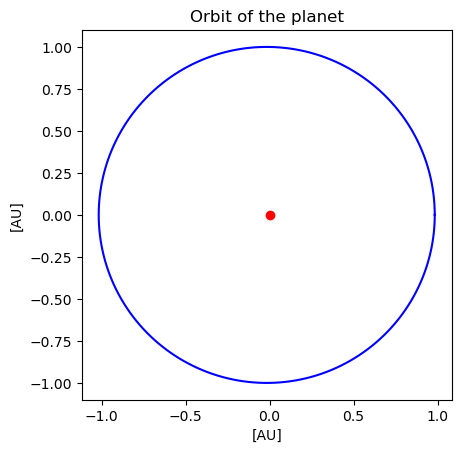

In [7]:
# -----------------------------------------------------------------
# There is a append later => use list instead of tuples 
# pos_x, pos_y = (), () 
pos_x = []
pos_y = []

# -----------------------------------------------------------------
# Operations
sampling = 400 # Number of points in on the orbit. Increase from 4 to e.g. 400 
#print(int(T), int(T/sampling))
print(int(T), T/sampling)

#for i in range(0, int(T), int(T/sampling)):

#for i in range(0, sampling):
# We missed the last sampling point
for i in range(0, sampling+1):
    
#    mean_anomaly = (360 / T) * (i * T/sampling)
# The mean anomaly requires the full period to be in radians, not in degrees 
    mean_anomaly = (2. * np.pi / T) * (i * T/sampling)
    eccentric_anomaly = Get_eccentric_anomaly(e, mean_anomaly)
#    print(i, "eccentric_anomaly:", eccentric_anomaly)
    True_anomaly = 2 * np.arctan(np.sqrt( (1+e) / (1-e)) * np.tan(eccentric_anomaly / 2.))
    
    r = a * (1 - e*np.cos(eccentric_anomaly))

    # The list with the position should be MOVED IN THE LOOP
    # The variable is named True_anomaly, not true_anomaly
    #pos_x.append(r * np.cos(true_anomaly))
    #pos_y.append(r * np.sin(true_anomaly))
    pos_x.append(r * np.cos(True_anomaly))
    pos_y.append(r * np.sin(True_anomaly))

print(i, pos_x[-1], pos_y[-1])

f, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'aspect':'equal'})
plt.plot(pos_x, pos_y, color='blue')
plt.title("Orbit of the planet")

# The labels should not be m but AU 
# Original labeling
#plt.xlabel("[m]")
#plt.ylabel("[m]")
# Correct labeling below 
plt.xlabel("[AU]")
plt.ylabel("[AU]")

plt.plot(0,0,'ro') # star
plt.show()

## Going further (optional)

Now, that your code is working, you can consider reformatting it to make make it more flexible.   
By splitting it into more function you may more easily modify it to plot the orbits of several planets with different masses and eccentricities. 